In [1]:
from benchmark import simple_random_circuit, BenchmarkSimu
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
nQubits = 10
depth = 1

### Benchmark simulation times

[['Rz', 0, 4.075419292255776]]
graphix.pattern.Pattern object with 4 commands and 1 output qubits
simu: FIRST ANGLE -1.297246251069161
SIMU Final computed angle: -4.075419292255776
GRAPHIX: FIRST ANGLE -1.297246251069161
GRAPHIX Final computed angle: 4.075419292255776
sv: [0.20261895-0.40195088j 0.79738105+0.40195088j]
graphix_sv: [0.31829149+0.63141945j 0.31829149-0.63141945j]
[['CNOT', [0, 1]], ['Rz', 0, 5.587396745333388], ['Rz', 1, 3.179927971482996]]
graphix.pattern.Pattern object with 16 commands and 2 output qubits
simu: FIRST ANGLE 0.0
SIMU Final computed angle: 0.0
simu: FIRST ANGLE 0.0
SIMU Final computed angle: 0.0
simu: FIRST ANGLE -1.7785236220707532
SIMU Final computed angle: -5.587396745333388
simu: FIRST ANGLE -1.012202510675405
SIMU Final computed angle: 3.179927971482996
GRAPHIX: FIRST ANGLE 0
GRAPHIX Final computed angle: 0.0
GRAPHIX: FIRST ANGLE 0
GRAPHIX Final computed angle: 0.0
GRAPHIX: FIRST ANGLE -1.7785236220707532
GRAPHIX Final computed angle: 5.5873967453333

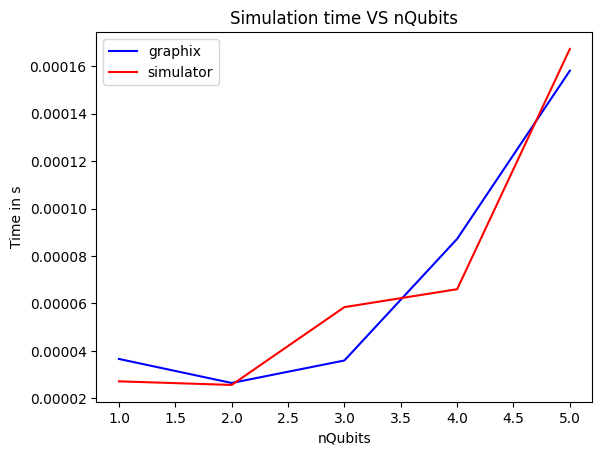

In [7]:
simu_times = []
nQubits = 5

for n in range(1, nQubits + 1):    
    circ = simple_random_circuit(n, depth)
    print(circ.instruction)
    p = circ.standardize_and_transpile()
    print(p)
    bench = BenchmarkSimu(p)
    simu_times.append(bench.bench_mbqc_simu(it=100))

x = list(range(1, nQubits + 1))
graphix_simu_times = [simu_times[i]['graphix_simu'] for i in range(len(simu_times))]
simu_times = [simu_times[i]['sv_simu'] for i in range(len(simu_times))]

plt.plot(x, graphix_simu_times, '-b', label='graphix')
plt.plot(x, simu_times, '-r', label='simulator')
plt.legend(loc='upper left')
plt.xlabel('nQubits')
plt.ylabel('Time in s')
plt.title('Simulation time VS nQubits')
plt.show()

### Benchmark command times

In [24]:
cmd_times = []
nQubits = 10

for n in range(1, nQubits + 1):    
    circ = simple_random_circuit(n, depth)
    p = circ.standardize_and_transpile()
    print(f'Benchmarking MBQC with {n} input qubits')
    bench = BenchmarkSimu(p)
    cmd_times.append(bench.bench_cmd_times(it=100))
    """
    try:
        cmd_times.append(bench.bench_cmd_times(it=100))
    except Exception as e:
        print(e)
        print(list(p))
        cmd_times.append(cmd_times[-1])
    """
x = list(range(1, nQubits + 1))
labels = ['N', 'M', 'E', 'X', 'Z']
colors = ['b', 'g', 'r', 'c', 'm']
graphix_cmd_times = [
    [cmd['N']['graphix'] for cmd in cmd_times],
    [cmd['M']['graphix'] for cmd in cmd_times],
    [cmd['E']['graphix'] for cmd in cmd_times],
    [cmd['X']['graphix'] for cmd in cmd_times],
    [cmd['Z']['graphix'] for cmd in cmd_times]
]
sv_simu_cmd_times = [
    [cmd['N']['simu'] for cmd in cmd_times],
    [cmd['M']['simu'] for cmd in cmd_times],
    [cmd['E']['simu'] for cmd in cmd_times],
    [cmd['X']['simu'] for cmd in cmd_times],
    [cmd['Z']['simu'] for cmd in cmd_times]
]

for i, label in enumerate(labels):
    plt.plot(x, graphix_cmd_times[i], 'r', label=f'{label}-graphix')
    plt.plot(x, sv_simu_cmd_times[i], 'b', label=f'{label}-simu')
    plt.legend(loc='upper left')
    plt.xlabel('nQubits')
    plt.ylabel('Time in s')
    plt.title('Simulation time VS nQubits')
    plt.show()

Benchmarking MBQC with 1 input qubits
SIMU Final computed angle: -6.215014774279537
GRAPHIX Final computed angle: 6.215014774279537
SIMU Final computed angle: -6.215014774279537
GRAPHIX Final computed angle: 6.215014774279537
SIMU Final computed angle: -6.215014774279537
GRAPHIX Final computed angle: 6.215014774279537
SIMU Final computed angle: -6.215014774279537
GRAPHIX Final computed angle: 6.215014774279537
SIMU Final computed angle: -6.215014774279537
GRAPHIX Final computed angle: 6.215014774279537
SIMU Final computed angle: -6.215014774279537
GRAPHIX Final computed angle: 6.215014774279537
SIMU Final computed angle: -6.215014774279537
GRAPHIX Final computed angle: 6.215014774279537
SIMU Final computed angle: -6.215014774279537
GRAPHIX Final computed angle: 6.215014774279537
SIMU Final computed angle: -6.215014774279537
GRAPHIX Final computed angle: 6.215014774279537
SIMU Final computed angle: -6.215014774279537
GRAPHIX Final computed angle: 6.215014774279537
SIMU Final computed an

ValueError: Pattern.max_space is larger than max_qubit_num. Increase max_qubit_num and try again